# PROJET STATISTIQUE

In [6]:
pip install wordcloud


[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: C:\Users\USER\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [7]:
# CHARGEMENTS DES PACKAGES NECESSAIRES
import pandas as pd
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [8]:
pip install openpyxl

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: C:\Users\USER\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [9]:
# IMPORTATION DES DONN2ES
data = pd.read_excel("makeorg_sport.xlsx")

* #  STATISTIQUES DESCRIPTIVES

In [10]:
print(data)

                                            Proposition Nom d'auteur   Âge  \
0     Il faut sensibiliser les enfants depuis le plu...    DOMINIQUE  68.0   
1     Il faut que les communes facilitent la "marche...        Klaus  53.0   
2     Il faut dès l'école faire le lien entre la san...          Léo  46.0   
3     Il faut être très rigoureux des l'enfance sur ...        Cathy  60.0   
4     Il faut permettre à ceux ayant un handicap et ...     Bertrand   NaN   
...                                                 ...          ...   ...   
1904  Il faut adopter un chien ça fera à minima 45 m...       Esther   NaN   
1905  Il faut pouvoir exclure tout membre d’une fédé...     Caroline  57.0   
1906  Il faut réduire le nombre d'arrêt de bus en vi...        Alain  50.0   
1907  Il faut inciter les Français à s'équiper de mo...       Esther  61.0   
1908  Il faut encourager les garçons à s'inscrire da...        Cérès   NaN   

      Département Zone d'adhésion  Nb de votes  Zone score  % p

In [11]:
# Statistiques descriptives sur les votes
print(data['Nb de votes'].value_counts(normalize=True))

Nb de votes
96     0.385542
98     0.102672
97     0.069146
95     0.051336
94     0.035097
         ...   
535    0.000524
572    0.000524
190    0.000524
600    0.000524
34     0.000524
Name: proportion, Length: 207, dtype: float64


In [12]:
# Longueur des propositions
data['length'] = data['Proposition'].apply(len)
print(data['length'].describe())

count    1909.000000
mean      114.013096
std        26.369996
min        21.000000
25%        98.000000
50%       124.000000
75%       135.000000
max       140.000000
Name: length, dtype: float64


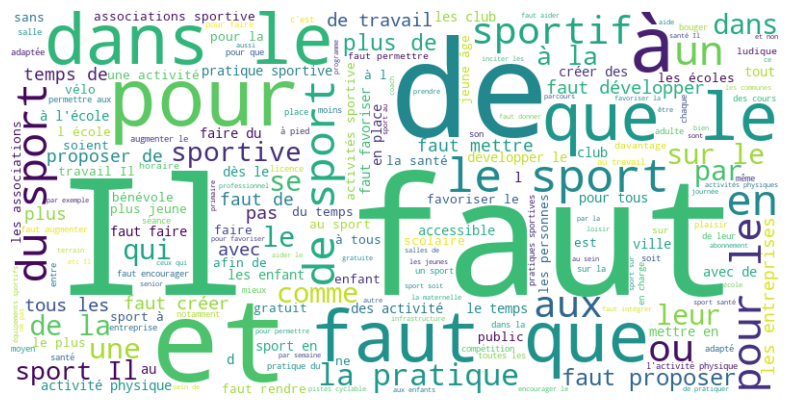

In [13]:
# Nuage de mots pour un aperçu des mots fréquents
text = " ".join(data['Proposition'])
wordcloud = WordCloud(width=800, height=400, background_color="white").generate(text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

* # Analyse des données manquantes

In [14]:
# Visualisation des données manquantes
missing_values = data.isnull().sum()
print(missing_values)


Proposition          0
Nom d'auteur         0
Âge                393
Département        910
Zone d'adhésion      0
Nb de votes          0
Zone score           0
% pour               0
% contre             0
% neutre             0
Id                   0
length               0
dtype: int64


In [15]:
# Proportion des données manquantes par colonne
missing_percentage = (data.isnull().sum() / len(data)) * 100
print(missing_percentage)

Proposition         0.000000
Nom d'auteur        0.000000
Âge                20.586695
Département        47.668937
Zone d'adhésion     0.000000
Nb de votes         0.000000
Zone score          0.000000
% pour              0.000000
% contre            0.000000
% neutre            0.000000
Id                  0.000000
length              0.000000
dtype: float64


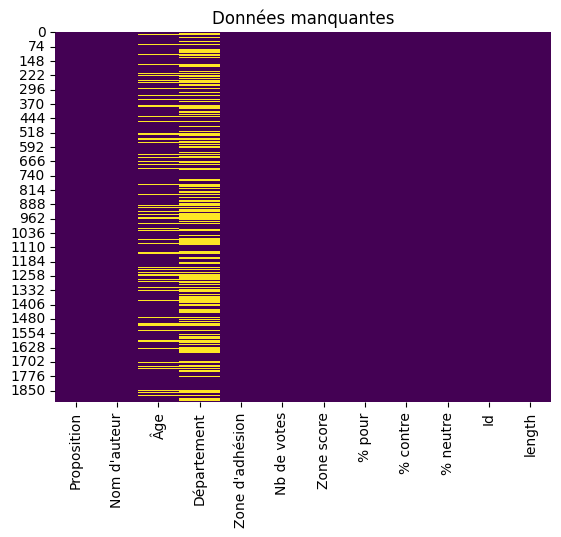

In [16]:
# Visualisation graphique des données manquantes
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(data.isnull(), cbar=False, cmap="viridis")
plt.title("Données manquantes")
plt.show()


* # Prétraitement des données textuelles

In [17]:
pip install nltk

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: C:\Users\USER\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [18]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

In [19]:
# Télécharger les stopwords
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...


True

In [20]:


lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('french'))

def preprocess_text(text):
    tokens = word_tokenize(text.lower())  # Mise en minuscule et tokenisation
    tokens = [word for word in tokens if word.isalpha()]  # Retirer les chiffres et ponctuations
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]
    return " ".join(tokens)

data['cleaned_propositions'] = data['Proposition'].apply(preprocess_text)


In [21]:
print(data['cleaned_propositions'])

0       faut sensibiliser enfants depuis plus jeune âg...
1       faut commune facilitent marche ville aménagean...
2       faut dès faire lien entre santé sport démontre...
3       faut être très rigoureux état bienveillant a d...
4       faut permettre ceux handicap souhaitent faire ...
                              ...                        
1904    faut adopter chien ça fera minimum minute marc...
1905    faut pouvoir exclure tout membre fédération ré...
1906    faut réduire nombre bus ville obliger marche s...
1907    faut inciter français montres connectées stimu...
1908          faut encourager garçons club football rugby
Name: cleaned_propositions, Length: 1909, dtype: object


* # Modélisation des thématiques avec Word2Vec

In [22]:
pip install --upgrade scipy gensim


  You can safely remove it manually.
  You can safely remove it manually.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
osqp 0.6.5 requires scipy<1.12.0,>=0.13.2, but you have scipy 1.13.1 which is incompatible.

[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: C:\Users\USER\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip



     ---------------------------------------- 0.0/60.8 kB ? eta -:--:--
     ---------------------------------------- 0.0/60.8 kB ? eta -:--:--
     -------------------- ------------------- 30.7/60.8 kB ? eta -:--:--
     -------------------------------- ----- 51.2/60.8 kB 871.5 kB/s eta 0:00:01
     -------------------------------------- 60.8/60.8 kB 647.7 kB/s eta 0:00:00
     ---------------------------------------- 0.0/60.6 kB ? eta -:--:--
     --------------------------------- ------ 51.2/60.6 kB 1.3 MB/s eta 0:00:01
     ---------------------------------------- 60.6/60.6 kB 1.1 MB/s eta 0:00:00
   ---------------------------------------- 0.0/24.0 MB ? eta -:--:--
   ---------------------------------------- 0.1/24.0 MB 2.0 MB/s eta 0:00:13
   ---------------------------------------- 0.1/24.0 MB 1.7 MB/s eta 0:00:14
   ---------------------------------------- 0.1/24.0 MB 1.7 MB/s eta 0:00:14
   ---------------------------------------- 0.2/24.0 MB 1.1 MB/s eta 0:00:21
   ---------

In [23]:
pip install gensim

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: C:\Users\USER\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [24]:
from gensim.models import Word2Vec

In [25]:
# Tokenisation des phrases
tokenized_sentences = [text.split() for text in data['cleaned_propositions']]

# Entraîner le modèle Word2Vec
model = Word2Vec(sentences=tokenized_sentences, vector_size=100, window=5, min_count=2, workers=4)

# Exemples de mots similaires
print(model.wv.most_similar("sport"))


[('faut', 0.9998504519462585), ('comme', 0.9998183846473694), ('plus', 0.999750554561615), ('club', 0.9997326135635376), ('sportifs', 0.999732494354248), ('santé', 0.9997298121452332), ('sportives', 0.9997288584709167), ('faire', 0.9997220635414124), ('sportif', 0.9997214078903198), ('personnes', 0.9997153282165527)]


* # Analyse des thématiques

In [26]:
from sklearn.cluster import KMeans
import numpy as np

In [27]:
# Extraire les vecteurs
word_vectors = np.array([model.wv[word] for word in model.wv.key_to_index])
kmeans = KMeans(n_clusters=10, random_state=0).fit(word_vectors)

In [28]:
# Associer chaque mot à un cluster
words = list(model.wv.key_to_index.keys())
clusters = {i: [] for i in range(10)}
for word, cluster in zip(words, kmeans.labels_):
    clusters[cluster].append(word)

In [29]:
# Afficher les mots par cluster
for cluster, words in clusters.items():
    print(f"Cluster {cluster}: {', '.join(words[:10])}")

Cluster 0: instaurer, maisons, éduquer, âges, nutrition, inclure, dégager, remplacer, condition, éloignés
Cluster 1: proposer, développer, rendre, âge, donner, encourager, aider, équipements, inciter, jeune
Cluster 2: augmenter, entreprise, valoriser, obligatoire, jours, arrêter, senior, ludique, aller, offrir
Cluster 3: plus, sportives, faire, pratique, tous, physique, club, sportifs, activités, santé
Cluster 4: faut, sport
Cluster 5: olympiques, subventionner, option, vivre, introduire, privilégier, administration, considérer, réorganiser, allier
Cluster 6: intégrer, promouvoir, accessible, davantage, parent, accessibles, licence, parcours, salle, compétition
Cluster 7: obliger, construire, interdire, famille, gratuitement, proposent, aménager, lien, baisser, loisirs
Cluster 8: temp, sportive, enfants, travail, association, favoriser, dès, activité, créer, mettre
Cluster 9: accompagner, journées, limiter, rembourser, imposer, abonnements, apprendre, inscription, cesser, importante


* # Croisement avec les votes et signalétique

In [30]:
# Calculer les scores moyens par thématique
data['cluster'] = kmeans.predict(word_vectors)  # Associe chaque proposition à un cluster
print(data['cluster'].describe())
mean_votes = data.groupby('cluster')['votes'].mean()
print(mean_votes)


ValueError: Length of values (1614) does not match length of index (1909)